<a href="https://colab.research.google.com/github/Bluecode99/AI-Training/blob/main/LinkedIn_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
url = 'https://github.com/LinkedInLearning/artificial-intelligence-foundations-neural-networks-4381282/blob/main/Advertising_2023.csv?raw=true'

advertising_df = pd.read_csv(url,index_col=0)

In [ ]:
advertising_df.head(10)

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9
6,13.05,8.7,48.9,75.0,7.2
7,86.25,57.5,32.8,23.5,11.8
8,180.30,120.2,19.6,11.6,13.2
9,12.90,8.6,2.1,1.0,4.8
10,299.70,199.8,2.6,21.2,10.6


In [ ]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [ ]:
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [ ]:
x = advertising_df[['digital','TV','radio','newspaper']]
y = advertising_df['sales']

In [ ]:
import keras

In [ ]:
normalized_feature = keras.utils.normalize(x.values)
print(normalized_feature)

[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state=101)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(719, 4) (480, 4) (719,) (480,)


In [ ]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
#Build the model
model = models.Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

In [ ]:
#Compile model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [ ]:
#Fit the model

history = model.fit(x_train, y_train, validation_data = (x_test,y_test),epochs = 32)

Epoch 1/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1106.5587 - mse: 1106.5587 - val_loss: 950.3486 - val_mse: 950.3486
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 848.0250 - mse: 848.0250 - val_loss: 754.6116 - val_mse: 754.6116
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 624.6552 - mse: 624.6552 - val_loss: 611.0341 - val_mse: 611.0341
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 487.8422 - mse: 487.8422 - val_loss: 511.0500 - val_mse: 511.0500
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 422.7754 - mse: 422.7754 - val_loss: 434.8382 - val_mse: 434.8382
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 395.0548 - mse: 395.0548 - val_loss: 379.1035 - val_mse: 379.1035
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 340.3420 - mse: 340.3420 - val_loss: 337.2436 - val_mse: 337.2436
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 312.7014 - mse: 312.7014 - val_loss: 304.3617 - val_mse: 304.3617
Epoch

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns #seaborn for visualization library based on matplotlib
%matplotlib inline
# keep the graphs inside the cell

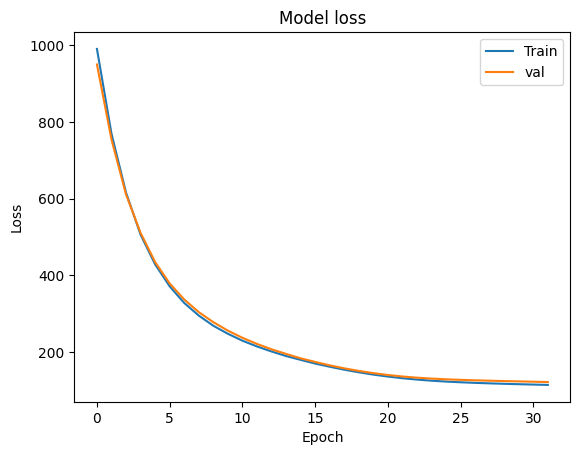

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc = 'upper right')
plt.show()

In [ ]:
test_predictions = model.predict(x_test).flatten()
print(test_predictions)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[28.12374   17.674519   1.3448975 27.263025   1.3448975 34.96007
  7.7100534 14.322509  15.865919  18.091606   1.3448975 14.448912
  1.3448975  1.3448975  8.170779   5.6972404  1.3448975  2.1913035
  1.3448975  1.3448975  1.3448975  1.3448975  1.3448975 15.562571
 12.061631   1.3448975  1.3448975 20.77869   15.744836  11.191812
  1.3448975 14.672867   1.3448975 28.008095   1.3448975  1.3448975
  1.3448975 28.593563  18.837286  14.86328    1.3448975 15.797824
  1.3448975  1.3448975  1.3448975  9.560359   1.3448975  1.3448975
  5.0207944  1.3448975  1.3448975  8.170779   1.3448975 11.556056
  5.0084434  1.3448975  1.3448975 10.298227   5.0982623 13.108378
  1.3448975  1.3448975  3.5481427 13.554341   7.7696805  1.825777
  8.701538   1.3448975 13.462489   1.3448975  2.7940195 13.502017
  1.7271163 16.649052   1.3448975 19.355848  25.09683    1.3448975
 14.672867   8.006288  19.797415   1.3448975  8.980413   3.4295754
  6.6897416  1.3448975 13.595991

In [ ]:
true_predicted = pd.DataFrame(list(zip(y_test,test_predictions)),columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,26.2,28.123739
1,19.0,17.674519
2,12.8,1.344898
3,20.8,27.263025
4,16.9,1.344898
5,23.8,34.960072
6,9.3,7.710053
7,22.6,14.322509
8,18.9,15.865919
9,14.9,18.091606


In [ ]:
import numpy as np
pred_train = model.predict(x_train)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_train,pred_train)))

10.675988038614989


In [ ]:
pred_test = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test)))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11.044910414418394
